In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [3]:
df = pd.read_csv("Group_5_data_cleaned.csv")
df.head()

,Unnamed: 0,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),is_Winter,is_Spring,is_Summer,is_Autumn,is_Holiday,is_Functioning_day,Month,Day,int_date
0,0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
1,1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
2,2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
3,3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
4,4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0


In [4]:
df = df.drop(['Unnamed: 0'],axis=1)

In [5]:
X = df.drop('Rented Bike Count',axis=1)
y = df['Rented Bike Count']

In [6]:
#Min Max scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score

scaler = MinMaxScaler()
model=scaler.fit(X)
scaled_X=model.transform(X)

y = y.values.reshape(-1, 1)
model1=scaler.fit(y)
scaled_y=model1.transform(y)

In [7]:
#splitting data into train,validation and test datasets
X_train, X_rem, y_train, y_rem = train_test_split(scaled_X,scaled_y, train_size=0.80,random_state=42)

In [8]:
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=42)

In [9]:
# shapes of train,validation and  test split
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(7008, 17)
(7008, 1)
(876, 17)
(876, 1)
(876, 17)
(876, 1)


(None, None)

In [10]:
#fitting a random decision tree model

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [11]:
y_test_pred = regressor.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_pred, y_test)
print("MSE:", mse)

MSE: 0.003916616417591237


In [13]:
regressor.score(X_test, y_test)

0.8699309221476673

In [14]:
#model on the train dataset
y_train_pred = regressor.predict(X_train)
MSE = metrics.mean_squared_error(y_train_pred, y_train)
MAE =  metrics.mean_absolute_error(y_train_pred, y_train)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.0
The mean absolute error is 0.0
The root mean sqaured error is 0.0


In [15]:
#model on the validation dataset
y_valid_pred = regressor.predict(X_valid)
MSE = metrics.mean_squared_error(y_valid_pred, y_valid)
MAE =  metrics.mean_absolute_error(y_valid_pred, y_valid)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.005005211302240702
The mean absolute error is 0.03538170742355836
The root mean sqaured error is 0.07074751799350068


R^2 is 0.8699309221476673
RMSE is: 0.06258287639275809


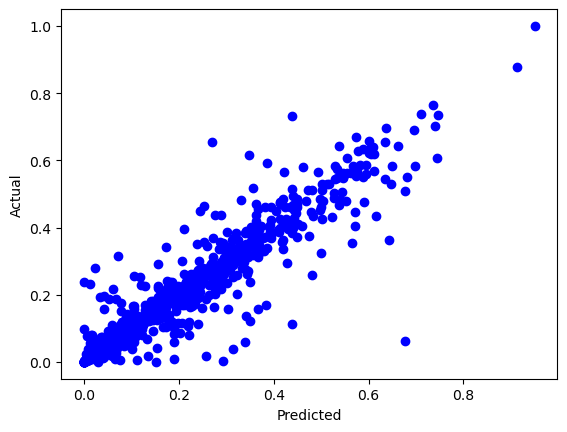

In [16]:
plt.scatter(y_test_pred,y_test,color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'R^2 is {regressor.score(X_test,y_test)}\nRMSE is: {metrics.mean_squared_error(y_test,y_test_pred,squared=False)}')

In [17]:
# How error is changing by varying the max_depth parameter of the tree
max_depth = []
mse_train = []
mse_valid = []


for i in range(1, 50):
    model = DecisionTreeRegressor(criterion='squared_error', max_depth=i)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    mse_train.append(metrics.mean_squared_error(y_train_pred, y_train))
    y_valid_pred = model.predict(X_valid)
    mse_valid.append(metrics.mean_squared_error(y_valid_pred, y_valid))
    max_depth.append(i)
    
k = pd.DataFrame({'max_depth': max_depth,
                  'mse_train': mse_train,
                  'mse_valid': mse_valid
                 })
  

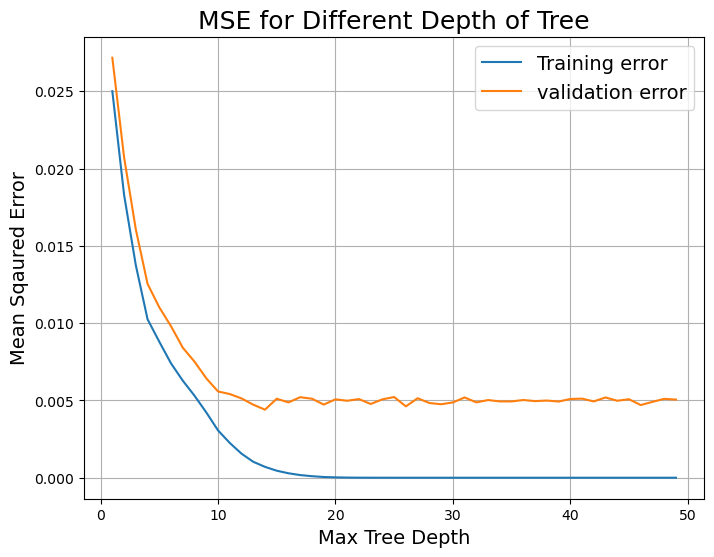

In [18]:
plt.figure(figsize = (8, 6))

plt.plot(k.max_depth, k.mse_train, label='Training error')
plt.plot(k.max_depth, k.mse_valid , label='validation error')
plt.xlabel('Max Tree Depth', fontsize=14)
plt.ylabel('Mean Sqaured Error', fontsize=14)
plt.title('MSE for Different Depth of Tree', fontsize=18)
plt.grid()
plt.legend(fontsize=14);

In [19]:
# How error is changing by varying the min_samples_split parameter of the tree
min_samples_split =  []
mse_train = []
mse_valid = []


for i in range(500,2,-10):
    model = DecisionTreeRegressor(criterion='squared_error', min_samples_split=i)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    mse_train.append(metrics.mean_squared_error(y_train_pred, y_train))
    y_valid_pred = model.predict(X_valid)
    mse_valid.append(metrics.mean_squared_error(y_valid_pred, y_valid))
    min_samples_split.append(i)
    
d = pd.DataFrame({'min_samples_split': min_samples_split,
                  'mse_train': mse_train,
                  'mse_valid': mse_valid
                 })

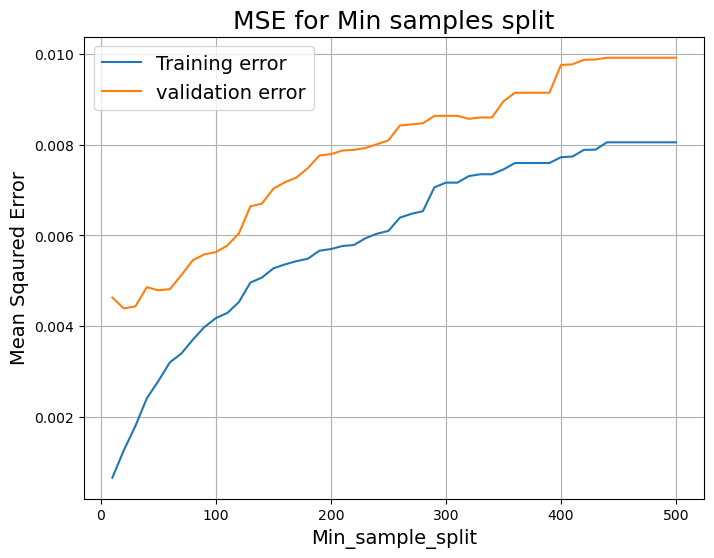

In [20]:
plt.figure(figsize = (8, 6))

plt.plot(d.min_samples_split, d.mse_train, label='Training error')
plt.plot(d.min_samples_split, d.mse_valid , label='validation error')
plt.xlabel('Min_sample_split', fontsize=14)
plt.ylabel('Mean Sqaured Error', fontsize=14)
plt.title('MSE for Min samples split', fontsize=18)
plt.grid()
plt.legend(fontsize=14);

# Finding best model using randomized search

In [21]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
            "min_samples_split":[1,4,7,9,10,15,18,20],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["auto","log2","sqrt",None],
         }

In [22]:
reg = DecisionTreeRegressor()
dt = RandomizedSearchCV(reg, 
                            param_distributions = parameters,
                            cv=5,
                        n_iter=100,
                       scoring='neg_mean_squared_error'
                            )
dt.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=100,
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [1, 4, 7, 9, 10,
                                                              15, 18, 20],
                                        'splitter': ['best', 'random']},
                   scoring='neg_mean_squared_error')

In [23]:
print(dt.best_params_)

{'splitter': 'best', 'min_samples_split': 18, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 12}


In [24]:
#fitting best model
best_reg = DecisionTreeRegressor(splitter='best', min_samples_split= 4, min_samples_leaf= 5, 
                                 max_features= 'auto', max_depth= 12)
best_reg.fit(X_train,y_train)
filename = 'decisiontreeRegressor.pkl'
pickle.dump(best_reg, open(filename, 'wb'))

In [25]:
#Evaluating model on validation dataset
#model on the validation dataset
y_valid_pred = best_reg.predict(X_valid)
MSE = metrics.mean_squared_error(y_valid_pred, y_valid)
MAE =  metrics.mean_absolute_error(y_valid_pred, y_valid)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.004686816186644734
The mean absolute error is 0.03953384261413562
The root mean sqaured error is 0.0684603256393419


In [26]:
#best model on the test dataset
y_test_pred = best_reg.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.004011680936112484
The mean absolute error is 0.03863118649931223
The root mean sqaured error is 0.06333783179200629
